In [1]:
import pandas as pd
from variants_compare import VariantsCompare
from pm4py.objects.conversion.log import converter as log_converter
from algorithm_ranking import MeasurementsVisualizer, MeasurementsManager, RankVariantsDFGTr, RankVariantsSort2
import random
from am4pa.data_proccessing import CaseDurationsManager

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
ct = pd.read_csv('saved-data/GLS_1000_100/ct_competing_variants.csv', index_col=[0])
alg_list = list(ct['case:concept:name'])
alg_list

['algorithm8',
 'algorithm2',
 'algorithm17',
 'algorithm53',
 'algorithm54',
 'algorithm58',
 'algorithm62',
 'algorithm66',
 'algorithm99',
 'algorithm88']

In [3]:
et = pd.read_csv('saved-data/GLS_1000_100/run_times_competing_1.csv',sep=';')
et['case:variant'] = et['case:concept:name'].apply(lambda row: row.split('_')[0])
et = et[et['case:variant'].isin(alg_list)]
cm = CaseDurationsManager()
cm.add_case_durations(et)

In [4]:
#et[et['case:variant']=='algorithm8']
et[et['case:concept:name']=='algorithm99_16']


,case:concept:name,concept:name,concept:flops,concept:operation,concept:kernel,timestamp:start,timestamp:end,case:variant
3546,algorithm99_16,transpose_1,1.0,tmp56 = X^T,"transpose!(ml3, ml0)",1.671793e+09,1.671793e+09,algorithm99
3547,algorithm99_16,LAPACK.potrf_3.33e+08,333000000.0,(L2 L2^T) = M,"LAPACK.potrf!('L', ml1)",1.671793e+09,1.671793e+09,algorithm99
3548,algorithm99_16,trsm_1e+08,100000000.0,tmp12 = (L2^-1 X),"trsm!('L', 'L', 'N', 'N', 1.0, ml1, ml0)",1.671793e+09,1.671793e+09,algorithm99
3549,algorithm99_16,syrk_1e+07,10000000.0,tmp14 = (tmp12^T tmp12),"syrk!('L', 'T', 1.0, ml0, 0.0, ml4)",1.671793e+09,1.671793e+09,algorithm99
3550,algorithm99_16,LAPACK.potrf_3.33e+05,333000.0,(L15 L15^T) = tmp14,"LAPACK.potrf!('L', ml4)",1.671793e+09,1.671793e+09,algorithm99
3551,algorithm99_16,trsv_1e+06,1000000.0,tmp68 = (L2^-1 y),"trsv!('L', 'N', 'N', ml1, ml2)",1.671793e+09,1.671793e+09,algorithm99
3552,algorithm99_16,trsv_1e+06,1000000.0,tmp71 = (L2^-T tmp68),"trsv!('L', 'T', 'N', ml1, ml2)",1.671793e+09,1.671793e+09,algorithm99
3553,algorithm99_16,trsm_1e+07,10000000.0,tmp219 = (L15^-1 tmp56),"trsm!('L', 'L', 'N', 'N', 1.0, ml4, ml3)",1.671793e+09,1.671793e+09,algorithm99
3554,algorithm99_16,trsm_1e+07,10000000.0,tmp90 = (L15^-T tmp219),"trsm!('L', 'L', 'T', 'N', 1.0, ml4, ml3)",1.671793e+09,1.671793e+09,algorithm99
3555,algorithm99_16,gemv_2e+05,200000.0,tmp24 = (tmp90 tmp71),"gemv!('N', 1.0, ml3, ml2, 0.0, ml5)",1.671793e+09,1.671793e+09,algorithm99


In [96]:
def rename_algs(alg_mes):
    new_alg_mes = {}
    l = [int(k.split('algorithm')[-1]) for k in list(alg_mes.keys())]
    l.sort()
    for i, alg in enumerate(l):
        new_alg_mes['alg{}'.format(i)] = alg_mes['algorithm{}'.format(alg)].copy()
    return new_alg_mes    
new_alg_mes = rename_algs(cm.get_alg_measurements())
alg_list = list(new_alg_mes.keys())

In [6]:
mv = MeasurementsVisualizer(cm.get_alg_measurements(), alg_list)
#mv = MeasurementsVisualizer(new_alg_mes, alg_list)

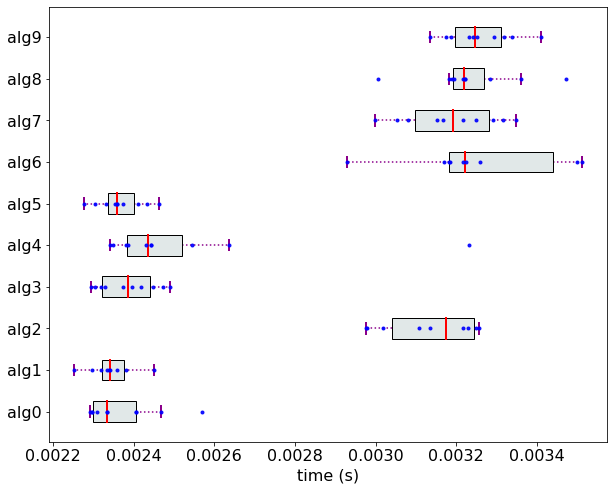

In [100]:
fig = mv.show_measurements_boxplots(scale=0.8,tick_size=16)

In [8]:
fig.savefig("gls-1000-100-box.svg", format="svg", bbox_inches="tight")

In [7]:
ct

,case:concept:name,case:flops,case:num_kernels,case:rank:q75-q25
0,algorithm8,445000000.0,8,0
1,algorithm2,445000000.0,8,0
2,algorithm17,447000000.0,8,1
3,algorithm53,455000000.0,8,0
4,algorithm54,455000000.0,8,0
5,algorithm58,455000000.0,8,0
6,algorithm62,456000000.0,10,1
7,algorithm66,456000000.0,10,1
8,algorithm99,466000000.0,10,1
9,algorithm88,466000000.0,10,1


In [7]:
rv = RankVariantsSort2(cm.get_alg_measurements(), alg_list)

In [8]:
rv.sort_h0_by_iqr()

,algs,iqr
7,algorithm8,0.000053
3,algorithm58,0.000064
5,algorithm88,0.000078
0,algorithm2,0.000106
8,algorithm99,0.000114
2,algorithm53,0.000120
1,algorithm54,0.000137
6,algorithm66,0.000183
4,algorithm17,0.000204
9,algorithm62,0.000257


In [9]:
ranks = rv.rank_variants()
ranks

,case:concept:name,case:rank:q75-q25
0,algorithm8,0
1,algorithm58,0
2,algorithm2,0
3,algorithm53,0
4,algorithm54,0
5,algorithm88,1
6,algorithm99,1
7,algorithm66,1
8,algorithm17,1
9,algorithm62,1


In [10]:
rv2 = RankVariantsDFGTr(cm.get_alg_measurements(), alg_list)

In [11]:
rv2.rank_variants()

,case:concept:name,case:rank:q75-q25
0,algorithm8,0
1,algorithm2,0
2,algorithm53,0
3,algorithm58,0
4,algorithm54,1
5,algorithm17,2
6,algorithm62,2
7,algorithm66,2
8,algorithm99,2
9,algorithm88,2


In [12]:
def clean_concept(name):
    splits = name.split('=')
    if len(splits) > 1:
        return splits[-1].strip()
    return splits[0].strip()

def remove_cost(name):
    splits = name.split('_')
    if len(splits) > 1:
        return splits[0].strip()
    return splits[0].strip()

def remove_LAPACK(name):
    splits = name.split('.')
    if len(splits) > 1:
        return splits[-1].strip()
    return splits[0].strip()


et['concept:name'] = et['concept:name'].apply(lambda row: clean_concept(row))
et['concept:name'] = et['concept:name'].apply(lambda row: remove_cost(row))
et['concept:name'] = et['concept:name'].apply(lambda row: remove_LAPACK(row))

In [13]:
xes_log = log_converter.apply(et)
best = ranks[ranks['case:rank:q75-q25']==0]['case:concept:name'].tolist()
worst = ranks[ranks['case:rank:q75-q25']==1]['case:concept:name'].tolist()
#worst = ['algorithm17']

In [14]:
activity_key = 'concept:name'
#activity_key = 'concept:operation'

In [15]:
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


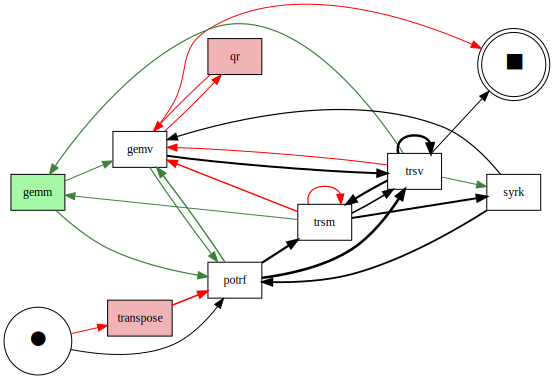

In [16]:
gviz = vc.get_dfg_minus_best_worst(orientation='LR')
gviz

In [17]:
gviz.render(filename='gviz/gls-1000-100-dfg', format='pdf')

'gviz/gls-1000-100-dfg.pdf'

In [47]:
best = ['algorithm2', 'algorithm8']
worst = ['algorithm53','algorithm58' ]
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


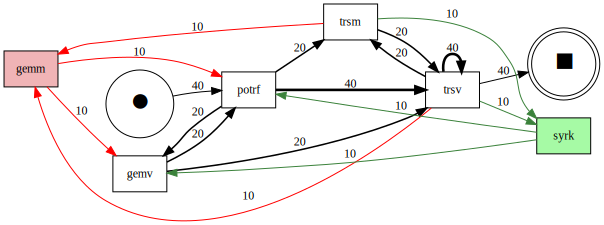

In [48]:
gviz = vc.get_dfg_minus_best_worst(orientation='LR')
gviz

In [49]:
gviz.render(filename='gviz/gls-1000-100', format='svg')

'gviz/gls-1000-100.svg'

In [18]:
best = ['algorithm2']
worst = ['algorithm8','algorithm17','algorithm53','algorithm54','algorithm58','algorithm62','algorithm66','algorithm99','algorithm88']
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


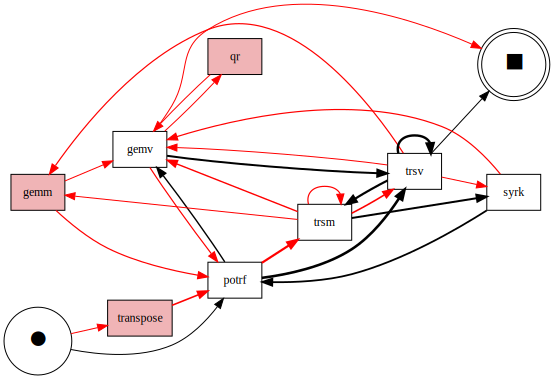

In [19]:
gviz = vc.get_dfg_minus_best_worst(orientation='LR')
gviz

In [20]:
gviz.render(filename='gviz/gls-median', format='pdf')

'gviz/gls-median.pdf'

In [21]:
best = ['algorithm8','algorithm2','algorithm53','algorithm58']
worst = ['algorithm17','algorithm54','algorithm62','algorithm66','algorithm99','algorithm88']
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key, variants_id_key="variant")

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


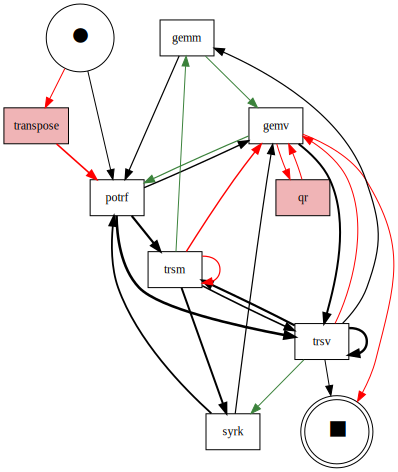

In [24]:
gviz = vc.get_dfg_minus_best_worst(orientation='TD')
gviz

In [23]:
gviz.render(filename='gviz/gls-top4', format='pdf')

'gviz/gls-top4.pdf'

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


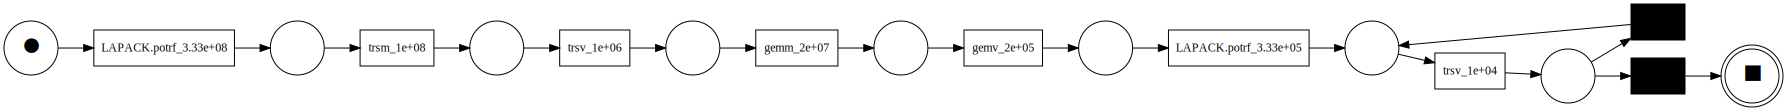

In [21]:
vc.show_petrinet(variants_list=['algorithm58'])

In [52]:
alg_list

['algorithm8',
 'algorithm2',
 'algorithm17',
 'algorithm53',
 'algorithm54',
 'algorithm58',
 'algorithm62',
 'algorithm66',
 'algorithm99',
 'algorithm88']